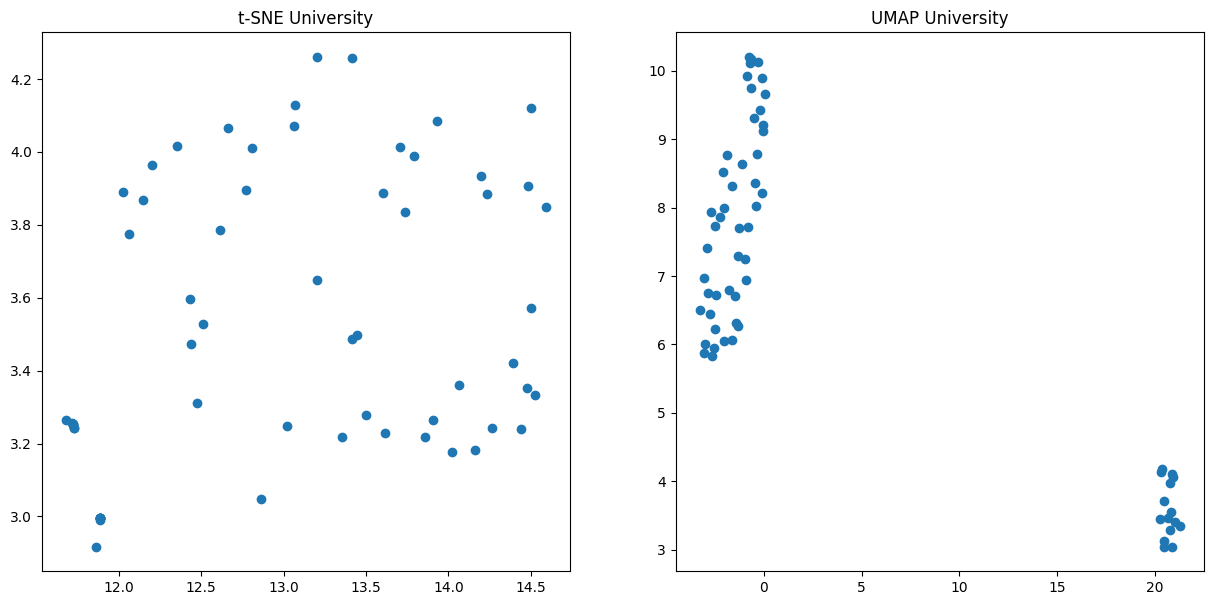

In [8]:
import pandas as pd
import re
from sklearn.preprocessing import LabelEncoder
from sklearn.manifold import TSNE
import umap
import matplotlib.pyplot as plt

data = []
with open('C:/Users/TO THANH/OneDrive/Máy tính/hôm nay/university.data', 'r') as file:
    university = {}
    for line in file:
        if '(def-instance' in line:
            university = {'name': line.split()[1]}
        elif '))' in line:
            data.append(university)
            university = {}
        else:
            matches = re.findall('\((.*?)\)', line)
            if matches:
                split_data = matches[0].split(None, 1)
                if len(split_data) == 2:
                    attribute, value = split_data
                    university[attribute] = value
df = pd.DataFrame(data)
le = LabelEncoder()
for column in df.columns:
    df[column] = le.fit_transform(df[column].astype(str))
tsne = TSNE(n_components=2, random_state=0, perplexity=50, early_exaggeration=20.0)
data_2d_tsne = tsne.fit_transform(df)
reducer = umap.UMAP()
data_2d_umap = reducer.fit_transform(df)
fig, ax = plt.subplots(1, 2, figsize=(15, 7))
ax[0].scatter(data_2d_tsne[:, 0], data_2d_tsne[:, 1])
ax[0].set_title('t-SNE University')
ax[1].scatter(data_2d_umap[:, 0], data_2d_umap[:, 1])
ax[1].set_title('UMAP University')
plt.show()

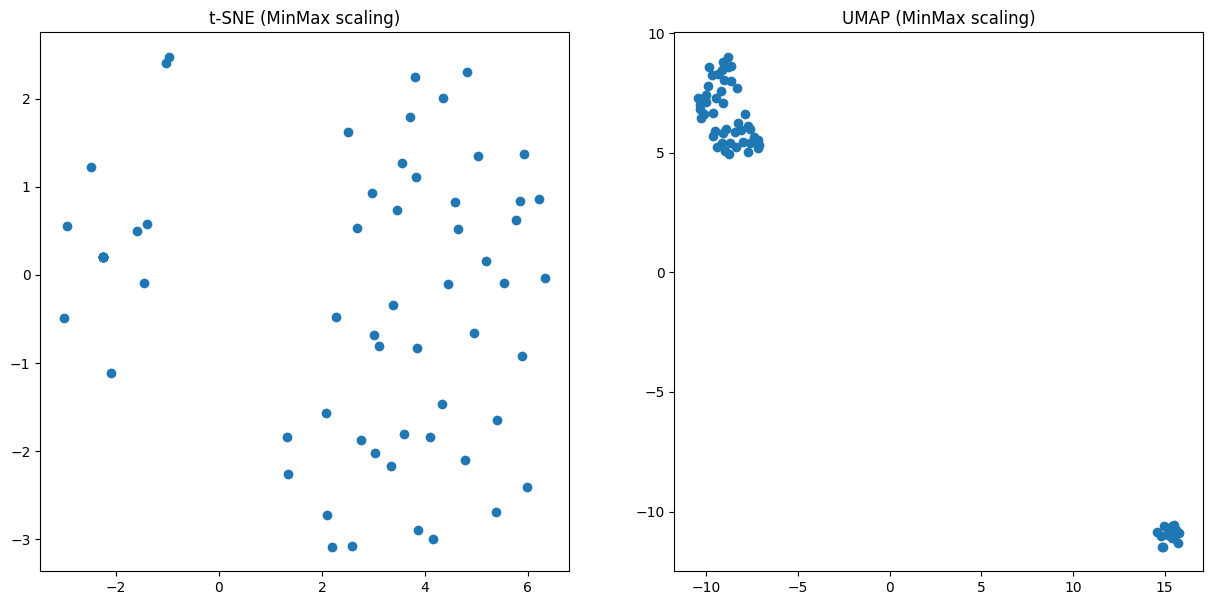

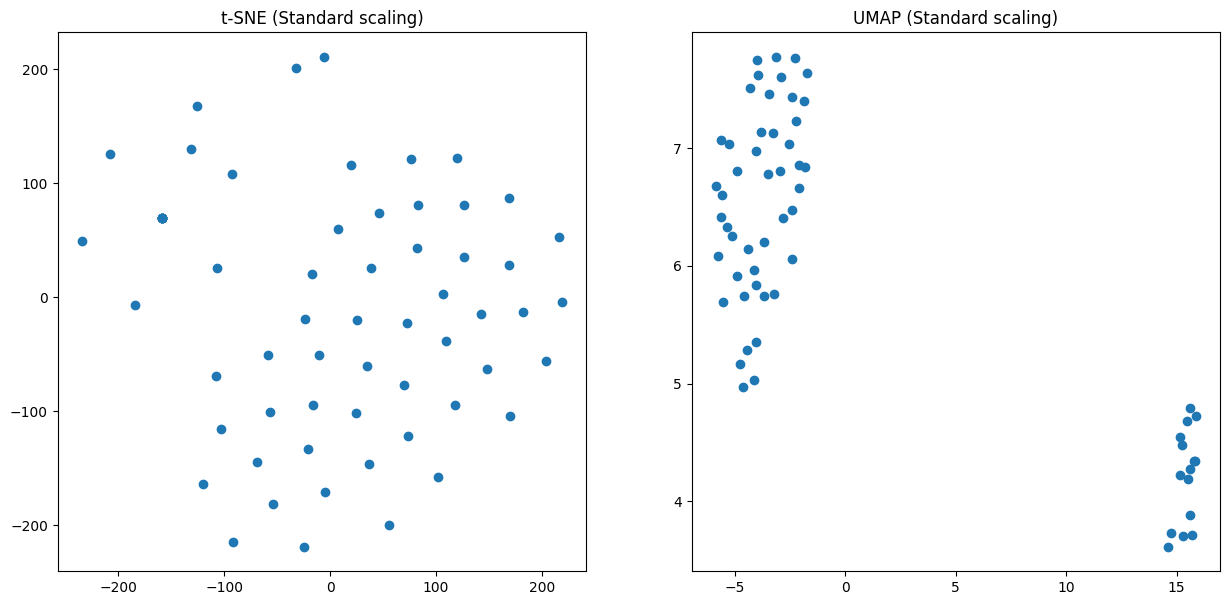

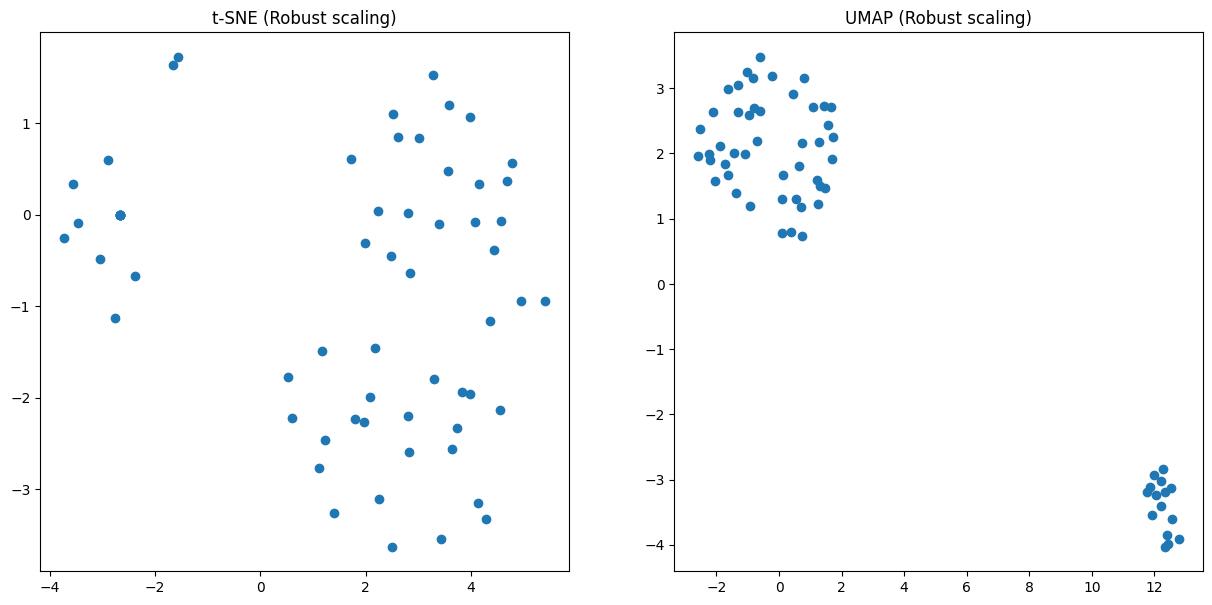

In [3]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
min_max_scaler = MinMaxScaler()
df_min_max = min_max_scaler.fit_transform(df)
standard_scaler = StandardScaler()
df_standard = standard_scaler.fit_transform(df)
robust_scaler = RobustScaler()
df_robust = robust_scaler.fit_transform(df)
scalers = [('MinMax', df_min_max), ('Standard', df_standard), ('Robust', df_robust)]
for name, scaled_df in scalers: 
    tsne = TSNE(n_components=2, random_state=0)
    data_2d_tsne = tsne.fit_transform(scaled_df)
    reducer = umap.UMAP()
    data_2d_umap = reducer.fit_transform(scaled_df)
    fig, ax = plt.subplots(1, 2, figsize=(15, 7))
    ax[0].scatter(data_2d_tsne[:, 0], data_2d_tsne[:, 1])
    ax[0].set_title(f't-SNE ({name} scaling)')

    ax[1].scatter(data_2d_umap[:, 0], data_2d_umap[:, 1])
    ax[1].set_title(f'UMAP ({name} scaling)')
    plt.show()

In [1]:
scalers = [('MinMax', df_min_max), ('Standard', df_standard), ('Robust', df_robust)]
fig, axes = plt.subplots(len(scalers), 2, figsize=(15, 7*len(scalers)))
for i, (name, scaled_df) in enumerate(scalers):
    tsne = TSNE(n_components=2, random_state=0)
    data_2d_tsne = tsne.fit_transform(scaled_df)
    reducer = umap.UMAP()
    data_2d_umap = reducer.fit_transform(scaled_df)

    axes[i][0].scatter(data_2d_tsne[:, 0], data_2d_tsne[:, 1])
    axes[i][0].set_title(f't-SNE ({name} scaling)')

    axes[i][1].scatter(data_2d_umap[:, 0], data_2d_umap[:, 1])
    axes[i][1].set_title(f'UMAP ({name} scaling)')

plt.tight_layout()
plt.show()

NameError: name 'df_min_max' is not defined

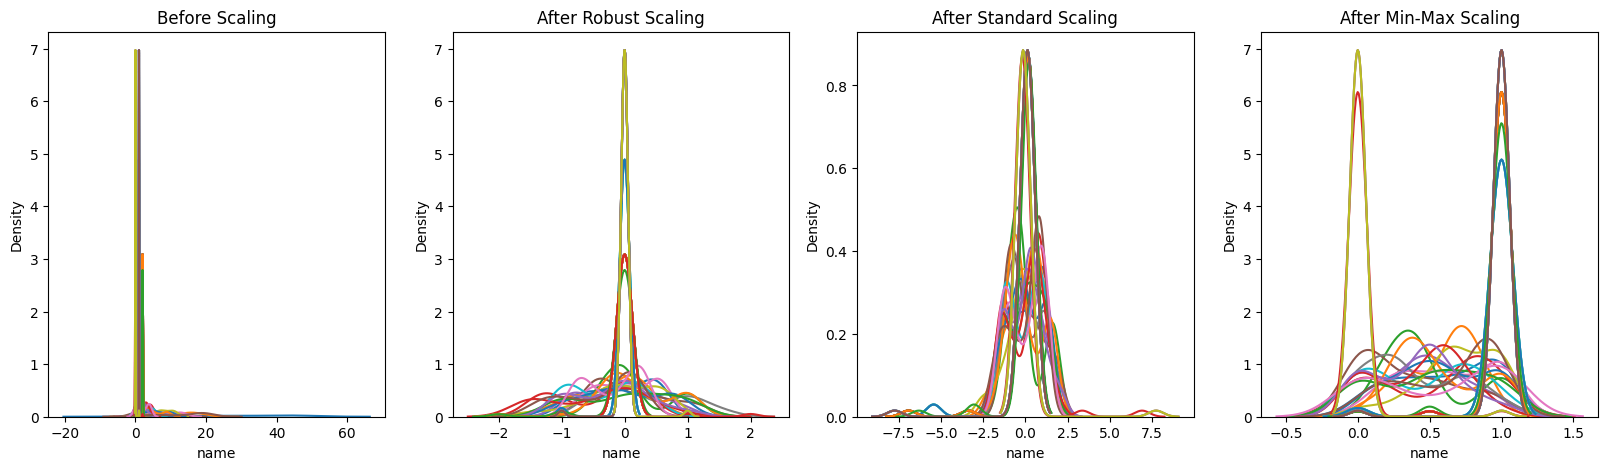

In [13]:
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
min_max_scaler = MinMaxScaler()
df_min_max = min_max_scaler.fit_transform(df)
df_min_max = pd.DataFrame(df_min_max, columns = df.columns)

standard_scaler = StandardScaler()
df_standard = standard_scaler.fit_transform(df)
df_standard = pd.DataFrame(df_standard, columns = df.columns)

robust_scaler = RobustScaler()
df_robust = robust_scaler.fit_transform(df)
df_robust = pd.DataFrame(df_robust, columns = df.columns)

fig, (ax1, ax2, ax3, ax4) = plt.subplots(ncols = 4, figsize =(20, 5))
ax1.set_title('Before Scaling')

for column in df.columns:
    sns.kdeplot(df[column], ax = ax1)

ax2.set_title('After Robust Scaling')

for column in df_robust.columns:
    sns.kdeplot(df_robust[column], ax = ax2)

ax3.set_title('After Standard Scaling')

for column in df_standard.columns:
    sns.kdeplot(df_standard[column], ax = ax3)

ax4.set_title('After Min-Max Scaling')

for column in df_min_max.columns:
    sns.kdeplot(df_min_max[column], ax = ax4)

plt.show()